# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

# Importing all the required packages and installing them

In [3]:
!conda create -n pycaret_env1 python=3.10 -y
!conda activate pycaret_env1
!pip install pycaret

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Chandra\anaconda3\envs\pycaret_env

  added / updated specs:
    - python=3.10.14


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/win-64::bzip2-1.0.8-h2bbff1b_6 
  ca-certificates    pkgs/main/win-64::ca-certificates-2024.7.2-haa95532_0 
  libffi             pkgs/main/win-64::libffi-3.4.4-hd77b12b_1 
  openssl            pkgs/main/win-64::openssl-3.0.15-h827c3e9_0 
  pip                pkgs/main/win-64::pip-24.2-py310haa95532_0 
  python             pkgs/main/win-64::python-3.10.14-he1021f5_1 
  setuptools         pkgs/main/win-64::setuptools-75.1.0-py310haa95532_0 
  sqlite             pkgs/main/win-64::sqlite-3.45.3-h2bbff1b_0 
  tk                 pkgs/main/win-64::tk-8.6.14-h0416ee5_0 
  tzdata             pkgs/main/noarch::tzdata-2024a-h04d1e81_0 
  vc                 pkgs/main/win-64::vc-14.40-h2eaa2aa_1 
  vs2015_run

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Chandra\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



#  Data science automation

This week is all about looking at automation tehcniques for data science and with Python. We can automate a lot of things with Python: collecting data, processing it, cleaning it, and many other parts of the data science pipeline. Here, we will show how to:

- use the pycaret autoML Python package to find an optimized ML model for our diabetes dataset
- create a Python script to ingest new data and make predictions on it

Often, next steps in fully operationalizing an ML pipeline like this are to use a cloud service to scale and serve our ML algorithm. We can use things like AWS lambda, GCP, AWS, or Azure ML depolyment with tools such as docker and kubernetes.

# Data Preparation

It includes pulling the dataset from the system and we are going to load our same prepared data from week 2 where everything has been converted to numbers.

In [105]:
import pandas as pd 
from pycaret.classification import *

In [149]:
df = pd.read_csv('prepared_churn_data.csv',index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455


In [150]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000


In [151]:
df.tail()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455
8361-LTMKD,4.0,1,0,2,74.40,306.60,1,76.650000
3186-AJIEK,66.0,1,2,1,105.65,6844.50,0,103.704545


In [152]:
from pycaret.classification import *

In [153]:
df.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'charge_per_tenure'],
      dtype='object')

In [154]:
?setup

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    prepro

## Use pycaret to find an ML algorithm that performs best on the data

In [164]:
# Set up the environment in PyCaret
automl = setup(data=df, target='Churn')

,Description,Value
0,Session id,531
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


INTERPRETATION:

Here, the preprocess is true it includes outliers treatment ,missing value treatment and feature engineering

In [165]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7949,0.8369,0.5168,0.6430,0.5725,0.4397,0.4446,0.1280
gbc,Gradient Boosting Classifier,0.7943,0.8396,0.4954,0.6498,0.5614,0.4302,0.4375,0.4240
ridge,Ridge Classifier,0.7907,0.8234,0.4426,0.6604,0.5286,0.4008,0.4149,0.0310
ada,Ada Boost Classifier,0.7905,0.8361,0.5092,0.6329,0.5635,0.4278,0.4327,0.1610
lda,Linear Discriminant Analysis,0.7888,0.8234,0.4992,0.6309,0.5565,0.4205,0.4260,0.0270
lightgbm,Light Gradient Boosting Machine,0.7872,0.8291,0.4992,0.6263,0.5545,0.4172,0.4225,0.2560
rf,Random Forest Classifier,0.7761,0.8088,0.4801,0.5982,0.5319,0.3872,0.3917,0.3530
knn,K Neighbors Classifier,0.7651,0.7481,0.4373,0.5770,0.4972,0.3477,0.3537,0.0730
et,Extra Trees Classifier,0.7637,0.7842,0.4809,0.5645,0.5187,0.3636,0.3660,0.2440
qda,Quadratic Discriminant Analysis,0.7509,0.8212,0.7446,0.5218,0.6134,0.4380,0.4533,0.0280


In [166]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=531, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

INTERPRETATION:

1. These are the best parameters for the model after hyperparameter tuning.

## Evaluation metric you think is best to use for finding the best model

In [167]:
df.iloc[-2:-1]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.4,306.6,1,76.65


We are selecting the last row, but using the indexing `[-2:-1]` to make it a 2D array instead of 1D (which throws an error). Try running `df.iloc[-1].shape` and `df.iloc[-2:-1].shape` to see how they differ.

However, this only works if we set `preprocess=False` in our setup function. Otherwise the order of features may be different

A more robust way (in case we are using preprocessing with autoML) is to use pycaret's predict_model function:

In [168]:
predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.5662


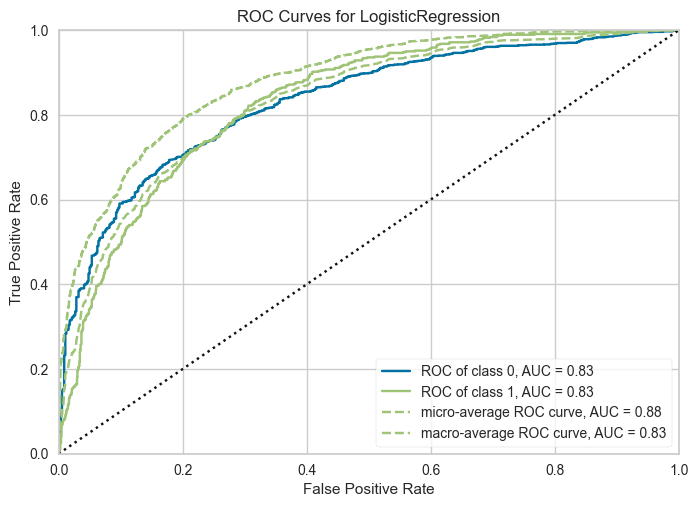

In [169]:
plot_model(best_model, plot='auc')

INTERPRETATIONS:
1. In this plot, The roc of class 0 and roc of class 1 both are positivily increasing against false positive rate and towards true positive rate which proves the efficiency of prediction.
2. the AUC values of class 0 and 1 are  above 0.8 which indicates better discrimination performance of the model.

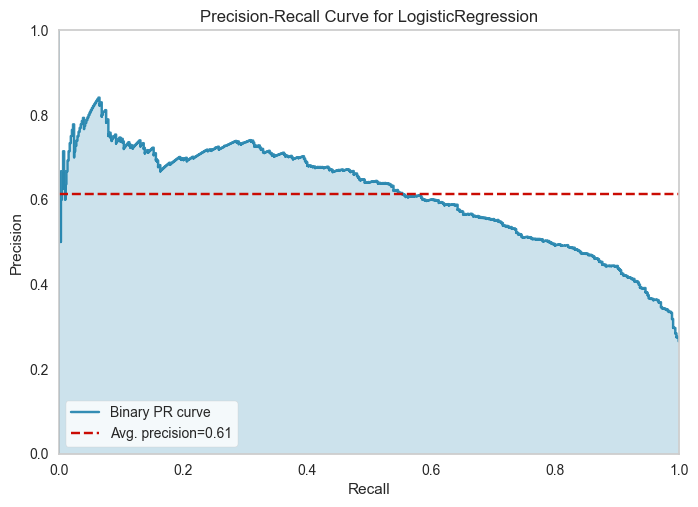

In [170]:
plot_model(best_model, plot='pr')

INTERPRETATION:
1. The Precision-Recall (PR) curve is another evaluation metric used in binary classification tasks, particularly when dealing with imbalanced datasets.
2. The PR curve is a graphical representation of the trade-off between precision and recall for different threshold values used to classify instances as positive or negative.
3. the curve has  downward trend i.e; with increase in Recall the Precision is decreasing rapidly.

# SAVING AND LOADING MODEL

Next, we want to save our trained model so we can use it in a Python file

In [171]:
save_model(best_model, 'lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'charge_per_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('c...
                                                         

## Using `pickle` for Model Persistence

To save and load trained machine learning models in Python, we utilize the `pickle` module. This allows us to serialize the model object into a file, enabling easy storage and future reuse without needing to retrain the model. This approach supports efficient deployment and sharing of models across different environments.


In [172]:
import pickle
with open('lr.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [173]:
with open('lr.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [174]:
loaded_lda = load_model('lr')

Transformation Pipeline and Model Successfully Loaded


In [175]:
new_data=df.iloc[-2:-1]

In [176]:
predict_model(loaded_lda, new_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.5662


# Making a Python module to make predictions

In [225]:
from IPython.display import Code

Code(r"predict_churn_data.py")

import pandas as pd
from pycaret.classification import predict_model, load_model

model = load_model('lr')


def load_data(filepath):
    """
    Loading churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df, threshold=0.75):
    """
    Using the pycaret best model to make predictions on data in the df dataframe.
    Rounds up to 1 if greater than or equal to the threshold.
    """
    predictions = predict_model(model, data=df)
    predictions['Churn_prediction'] = (predictions['prediction_score'] >= threshold)
    predictions['Churn_prediction'].replace({True: '0', False: '1'}, inplace=True)
    drop_cols = predictions.columns.tolist()
    drop_cols.remove('Churn_prediction')
    return predictions.drop(drop_cols, axis=1)


def calculate_accuracy(predicted_labels, true_labels):
    """
    Calculate the accuracy of predictions.
    """
    correct_predictions = [0 if pred == true else 1 for pred, true in zip(predicted_labels, true_labels)]
    accuracy = sum(correct_predictions) / len(correct_predictions)
    return accuracy


if __name__ == "__main__":
    df = load_data(r'new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

    # True values for comparison
    true_values = [1, 0, 0, 1, 0]
    
    # Calculating accuracy
    predicted_labels = predictions['Churn_prediction'].tolist()
    accuracy = calculate_accuracy(predicted_labels, true_values)
    
    print(f"Prediction Accuracy: {accuracy:.2f}")

In [226]:
%run predict_churn_data.py

Transformation Pipeline and Model Successfully Loaded


predictions:
           Churn_prediction
customerID                 
9305-CKSKC                1
1452-KNGVK                0
6723-OKKJM                0
7832-POPKP                1
6348-TACGU                0
Prediction Accuracy: 1.00


# Summary

1. First, the data used to train and test the ML model is a telecommunication churn dataset with only numeric features.
2. The next is I have imported the Pycaret package which contains the 'automl' function which by default does the preprocessing, splitting into training-testing data, then loading every model with train-test data, also it performs hyperparameter tuning and gives us the best ML model with the best accuracy and required best parameters.
3. Using the 'automl' function information, we can load, predict data, and save the model using the respective functions defined in the 'pycaret' package.
4. To test the efficiency of the prediction I have created a Python module and interlinked it with the current directory or notebook using the 'code()' and 'run' functions from the 'IPython.display' package and for the data I have used new churn dataset with known values for prediction.
5. After predicting and checking efficiency I have saved and uploaded all the files used and created into the GITHUB.

## The above code and explanation is Referenced from Class Lecture Notebook Week-5 class notes and explanations.

# Optional and Advanced Section

## Churn Prediction and Analysis

In [260]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pycaret.classification import *
from scipy.stats import percentileofscore

# Load the trained model
model = load_model('lr')  # Ensure your model named 'lr' exists

# Static file name for the input data
DATA_FILE_PATH = 'new_churn_data_unmodified.csv'

# Define a function to load data
def load_data(filepath):
    """
    Load churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df

# Define a function to calculate percentiles
def calculate_percentile(prediction_score, prob_dist):
    """
    Calculate the percentile of the prediction score within the distribution.
    """
    return percentileofscore(prob_dist, prediction_score)

# Preprocessing function to handle missing values and encode categorical features
def preprocess_data(df):
    """
    Preprocess the DataFrame by handling missing values and encoding categorical features.
    """
    print("Available columns in the DataFrame:", df.columns.tolist())

    # Convert 'TotalCharges' to numeric, handling errors
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Fill missing values for numeric types
    df.fillna(df.mean(numeric_only=True), inplace=True)  # Mean imputation for numeric columns

    # Create a simulated 'Churn' column for demonstration purposes.
    # Example Rule: If MonthlyCharges > 80, simulate churn as 1 (Yes), or else 0 (No)
    df['Churn'] = (df['MonthlyCharges'] > 80).astype(int)  # Here '1' represents churn and '0' represents no churn

    # Identify categorical columns
    categorical_cols = ['PhoneService', 'Contract', 'PaymentMethod']

    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df

# Define a class to encapsulate the prediction functions
class ChurnPredictor:
    def __init__(self):
        self.model = None

    def train_model(self, df):
        """
        Train the machine learning model using PyCaret.
        """
        print("Training the model...")
        setup(data=df, target='Churn', session_id=123)
        
        # Compare different models and select the best one based on AUC
        self.model = compare_models(sort='AUC')

    def preprocess_and_predict(self, filepath):
        # Load and preprocess data
        df = load_data(filepath)
        df = preprocess_data(df)

        # Train the model
        self.train_model(df)

        # Make predictions
        if self.model:
            predictions = predict_model(self.model, data=df)

            # Calculate percentiles for the prediction score
            prob_distribution = predictions['prediction_score']
            predictions['Percentile'] = predictions['prediction_score'].apply(
                lambda x: calculate_percentile(x, prob_distribution)
            )
            
            # Calculate prediction accuracy
            correct_predictions = (predictions['Label'] == df['Churn']).sum()  # Count correct predictions
            total_predictions = len(predictions)
            accuracy = correct_predictions / total_predictions  # Calculate accuracy
            
            print(f"Prediction Accuracy: {accuracy:.2%}")  # Print accuracy as percentage

            return predictions[['prediction_score', 'Percentile', 'Label']]  # Include the output columns

# Main execution block
if __name__ == "__main__":
    churn_predictor = ChurnPredictor()
    
    # Use the static file path for the dataset
    predictions = churn_predictor.preprocess_and_predict(DATA_FILE_PATH)

    # Display predictions
    if predictions is not None:
        print("Predictions and Percentiles:")
        print(predictions)


Transformation Pipeline and Model Successfully Loaded
Available columns in the DataFrame: ['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Training the model...


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5, 9)"
4,Transformed data shape,"(5, 9)"
5,Transformed train set shape,"(3, 9)"
6,Transformed test set shape,"(2, 9)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple
